## Tratamiento de datos de la tabla houses, posterior al scrapping

### 1 - Convertimos las habitaciones, baños y superficie a tipos numéricos. 

Establezco conexión a la BD

In [6]:
import os, sys
# # Con esto añado la ruta de la carpeta del backoffice al path temporalmente para poder importar el mismo módulo credenciales_sqlserver.py
current_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(current_dir, '../app')))
from credenciales_sqlserver import *
import pyodbc
import pandas as pd

connection_string = (
    # f"DRIVER={{ODBC Driver 17 for SQL Server}};"
    # f"DRIVER={{ODBC Driver 18 for SQL Server}};"
    f"DRIVER={{SQL Server}};"
    f"SERVER={SERVER},{PORT};"
    f"DATABASE={DATABASE};"
    f"UID={USERNAME};"
    f"PWD={PASSWORD}"
)
conn = pyodbc.connect(connection_string)

Extraigo los datos de la bd y monto un dataframe en pandas

In [7]:
query = "SELECT * FROM houses "
df = pd.read_sql(query, conn)
df

C:\Users\dsantamaria\AppData\Local\Temp\ipykernel_33512\2000845618.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,HOUSE_ID,TITLE,PRICE,ADDRESS1,ADDRESS2,CITY,ENERGY_CONSUME,ENERGY_EMISSION,PLANTA,SUPERFICIE,...,DISTRITO,PRICE_PER_NIGHT,DISTANCE_TO_METRO,DISTANCE_TO_CERCANIAS,DISTANCE_TO_EMT,DISTANCE_TO_INTERURBANOS,DISTANCE_TO_MLO,BUILT_AREA,BEDROOMS,BATHROOMS
0,100053144,Piso en venta en calle de Saturno,142000.0,Calle de Saturno,Barrio Casco Histórico de Barajas,"Madrid capital, Madrid",None,None,Planta 1ª,Consumo: \n260 kWh/m² año,...,Barajas,122.74,359.0,2346.0,193.0,217.0,6326.0,0,0,0
1,100225591,Casa o chalet independiente en venta en calle ...,439000.0,"Calle Espliego, 17",Villalbilla,"Corredor del Henares, Madrid",None,None,2 plantas,Parcela de 710 m²,...,Not defined,NaN,20543.0,7981.0,21894.0,41.0,31456.0,0,0,0
2,100281275,Chalet adosado en venta en Las Matas- Peñascales,280000.0,Barrio Las Matas- Peñascales,Distrito Las Matas- Peñascales,"Zona noroeste, Madrid",None,None,2 plantas,"Emisiones: \n65,5 kg CO2/m² año",...,Centro,155.44,11.0,22.0,218.0,1293.0,6431.0,0,0,0
3,100445913,Piso en venta en calle Marcelo Usera,259000.0,Calle Marcelo Usera,Barrio Moscardó,"Madrid capital, Madrid",icon-energy-c-f,icon-energy-c-f,None,"73 m² construidos, 67 m² útiles",...,Usera,128.58,157.0,1040.0,119.0,592.0,5857.0,0,0,0
4,100454896,Piso en venta en Fuentes s/n,139900.0,Fuentes s/n,Distrito Noroeste,"Corredor del Henares, Madrid",None,None,Planta 5ª exterior,63 m² construidos,...,Centro,155.44,10.0,22.0,219.0,1294.0,6430.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8203,99447659,Piso en venta en calle de Ascao,518000.0,Calle de Ascao,Barrio Pueblo Nuevo,"Madrid capital, Madrid",None,None,Planta 1ª,"162 m² construidos, 128 m² útiles",...,Ciudad Lineal,181.40,235.0,4518.0,40.0,387.0,5940.0,0,0,0
8204,99506799,"Piso en venta en calle de las Margaritas, 7",230000.0,"Calle de las Margaritas, 7",Becerril de la Sierra,"Zona noroeste, Madrid",None,None,Planta 3ª exterior,"110 m² construidos, 105 m² útiles",...,Not defined,NaN,32975.0,4787.0,29394.0,219.0,34195.0,0,0,0
8205,99616898,"Piso en venta en calle de Andrés Mellado, 18",480000.0,"Calle de Andrés Mellado, 18",Barrio Gaztambide,"Madrid capital, Madrid",None,None,Planta 4ª interior,"40 m² construidos, 32 m² útiles",...,Chamberí,106.55,219.0,1333.0,137.0,396.0,6334.0,0,0,0
8206,99904936,Piso en venta en Zaburdón - Monte Escorial,141000.0,Distrito Zaburdón - Monte Escorial,San Lorenzo de El Escorial,"Zona noroeste, Madrid",None,None,None,408 m² construidos,...,Not defined,NaN,36015.0,9768.0,28338.0,50.0,28731.0,0,0,0


Convierto a númerico habitaciones

<Axes: title={'center': 'Número de habitaciones por casa'}, ylabel='HABITACIONES'>

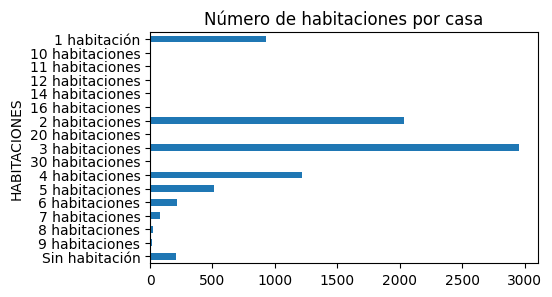

In [8]:
df['HABITACIONES'].value_counts().sort_index(ascending=False).plot(kind='barh', figsize=(5, 3), title='Número de habitaciones por casa')

In [9]:
df['BEDROOMS'] = df['HABITACIONES'].apply(lambda x: 0 if x.lower() == "sin habitación" else int(x.lower().replace("habitación", "").replace("habitaciones", "").strip()))

<Axes: title={'center': 'Número de habitaciones por casa'}, ylabel='BEDROOMS'>

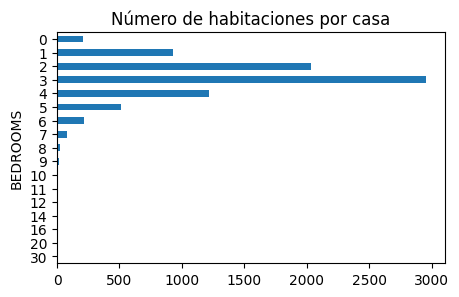

In [10]:
df['BEDROOMS'].value_counts().sort_index(ascending=False).plot(kind='barh', figsize=(5, 3), title='Número de habitaciones por casa')

Convierto a númerico baños

<Axes: title={'center': 'Número de baños por casa'}, ylabel='BANOS'>

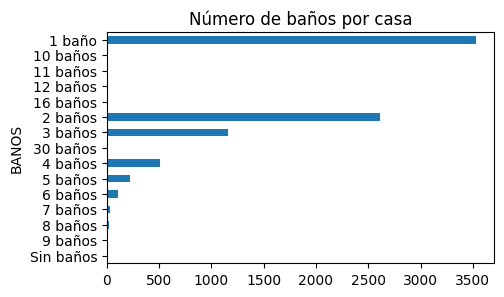

In [11]:
df['BANOS'].value_counts().sort_index(ascending=False).plot(kind='barh', figsize=(5, 3), title='Número de baños por casa')

In [12]:
df['BATHROOMS'] = df['BANOS'].apply(lambda x: 0 if x.lower() == "sin baños" else int(x.lower().replace("baños", "").replace("baño", "").strip()))

<Axes: title={'center': 'Número de baños por casa'}, ylabel='BATHROOMS'>

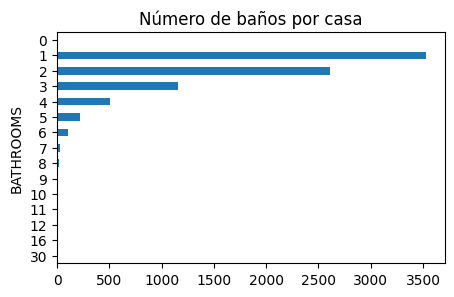

In [13]:
df['BATHROOMS'].value_counts().sort_index(ascending=False).plot(kind='barh', figsize=(5, 3), title='Número de baños por casa')

Convierto a númerico la superficie construida

In [14]:
df['SUPERFICIE'].sample(25)

8042                    50 m² construidos
375       54 m² construidos, 50 m² útiles
7640                    40 m² construidos
2376                   230 m² construidos
4555                    99 m² construidos
1235      81 m² construidos, 65 m² útiles
73       106 m² construidos, 98 m² útiles
4884    155 m² construidos, 137 m² útiles
611       54 m² construidos, 52 m² útiles
2707      70 m² construidos, 66 m² útiles
5389                   157 m² construidos
2114                    Parcela de 179 m²
4066                    52 m² construidos
33                     172 m² construidos
5610                   225 m² construidos
3582    160 m² construidos, 128 m² útiles
294                     89 m² construidos
4476                   123 m² construidos
59          Emisiones: \n47 kg CO2/m² año
1344                    92 m² construidos
4734                    42 m² construidos
7581                   107 m² construidos
2849            Consumo: \n251 kWh/m² año
2082      84 m² construidos, 80 m²

In [15]:
df['BUILT_AREA'] = df['SUPERFICIE'].apply(
    lambda x: next(
        (int(part.lower().replace('m²', '').replace('construidos', '').replace('.', '').strip())
         for part in x.split(',') if 'construidos' in part.lower()),
        0
    )
)

In [20]:
df['BUILT_AREA'].sample(25)

2681      0
4242     40
6028    144
3443     95
1322     70
2128    210
6928    144
6321    300
4712     58
5078    135
6870    133
3912     74
6070     94
1663     76
4505     72
6416    150
5359     70
3990    267
7393    420
836       0
868     110
2693    200
3016     89
3365    390
841     112
Name: BUILT_AREA, dtype: int64

Actualizo la tabla de la base de datos con los nuevos valores de los campos introducidos en el dataframe

<span style="color:orange">tarda unos tres minutos</span>

In [23]:
for index, row in df.iterrows():
    query = f"UPDATE HOUSES SET UPDATED_DATE=getdate(), BEDROOMS = {row['BEDROOMS']}, BATHROOMS = {row['BATHROOMS']}, BUILT_AREA = {row['BUILT_AREA']} WHERE HOUSE_ID = {row['HOUSE_ID']}"
    cursor = conn.cursor()
    cursor.execute(query)
    conn.commit()

Cierro conexión a la db

In [24]:
conn.close()

### 🚩 2 - Otros  🚩


En la carpeta de modelado, entre los distintos notebooks se generan las distancias a los distintos medios de transporte desde cada vivienda. También se entrena el modelo y se le pone precio por noche.